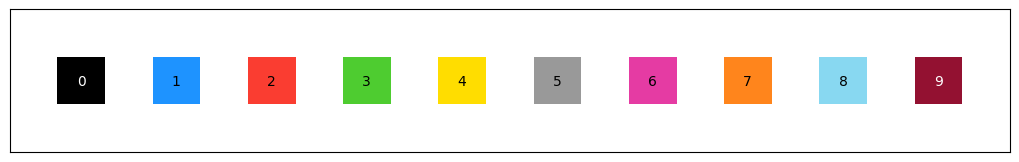

In [1]:
import sys
import json
import shutil
sys.path.append("../inputs/google-code-golf-2025/code_golf_utils")
from code_golf_utils import *
show_legend()

In [2]:
def get_examples(task_num):
    examples = load_examples(task_num)
    show_examples(examples['train'] + examples['test'])
    return examples

def save_file(task_num, sub_dir="/kaggle/working/submission/"):
    task_path = os.path.join(sub_dir, f"task{task_num:03d}.py")
    os.makedirs(sub_dir, exist_ok=True)
    shutil.copy("task.py", task_path)
    
def show_grid(out_grid, in_grid, ans_grid, figsize=(12, 4), k=-0.11):
    # Colors for each index
    colors = [
        (0, 0, 0),
        (30, 147, 255),
        (250, 61, 49),
        (78, 204, 48),
        (255, 221, 0),
        (153, 153, 153),
        (229, 59, 163),
        (255, 133, 28),
        (136, 216, 241),
        (147, 17, 49),
    ]
    colors = [(r/255, g/255, b/255) for r, g, b in colors]

    def plot_ax(ax, arr):
        rows = len(arr)
        cols = len(arr[0])
        # Draw each cell
        for y in range(rows):
            for x in range(cols):
                color = colors[arr[y][x]]
                rect = plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor="white")
                ax.add_patch(rect)

        # Axis limits
        ax.set_xlim(0, cols)
        ax.set_ylim(0, rows)
        # Center ticks in each cell
        ax.set_xticks([i + 0.5 for i in range(cols)])
        ax.set_yticks([i + 0.5 for i in range(rows)])
        # Label ticks as integers
        ax.set_xticklabels(range(cols))
        ax.set_yticklabels(range(rows))
        ax.tick_params(axis='both', length=0)
        # Move x-axis labels to top
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        # Invert y-axis so 0 is at the top
        ax.invert_yaxis()
        # Square cells
        ax.set_aspect('equal')

    fig, ax = plt.subplots(1, 3, figsize=figsize)
    plot_ax(ax[0],out_grid)
    ax[0].set_title("Output",y=k)
    plot_ax(ax[1], in_grid)
    ax[1].set_title("Input",y=k)
    plot_ax(ax[2],ans_grid)
    ax[2].set_title("Answer",y=k)
    plt.show()

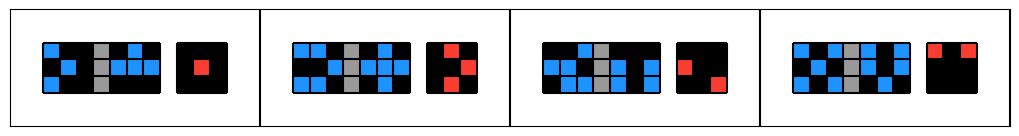

In [3]:
task_num = 6
examples = get_examples(task_num)

In [4]:
def p(g):
 return[[g[r][c]*2if g[r][c]==g[r][c+4]and g[r][c]else 0for c in range(3)]for r in range(3)]

In [5]:
with open("../inputs/google-code-golf-2025/task006.json", "r", encoding="utf-8") as f:
  task_data = json.load(f)

example = task_data["train"][0]
input_grid = example["input"]
expected_output = example["output"]
actual_output = p(input_grid)

is_correct = actual_output == expected_output
status = "✓ 成功" if is_correct else "✗ 失敗"

print(input_grid)
print(expected_output)
print(actual_output)
print(status)

[[1, 0, 0, 5, 0, 1, 0], [0, 1, 0, 5, 1, 1, 1], [1, 0, 0, 5, 0, 0, 0]]
[[0, 0, 0], [0, 2, 0], [0, 0, 0]]
[[0, 0, 0], [0, 2, 0], [0, 0, 0]]
✓ 成功


In [6]:
def test_all(task_num, solution_function=p, show_details=True):
    # テストデータと訓練データ、arc-genデータすべてでテストする機能強化版テスト関数
    with open(f"../inputs/google-code-golf-2025/task{task_num:03d}.json", "r", encoding="utf-8") as f:
        task_data = json.load(f)
    
    # 訓練データのテスト
    train_success = 0
    train_total = len(task_data["train"])
    if show_details:
        print("===== 訓練データ =====")
    
    for i, example in enumerate(task_data["train"]):
        input_grid = example["input"]
        expected_output = example["output"]
        actual_output = solution_function(input_grid)
        
        is_correct = actual_output == expected_output
        if is_correct:
            train_success += 1
        
        if show_details:
            status = "✓ 成功" if is_correct else "✗ 失敗"
            print(f"Train例{i+1}: {status}")
    
    if show_details or train_success < train_total:
        print(f"訓練データの成功率: {train_success}/{train_total}")
    
    # テストデータのテスト
    test_success = 0
    test_total = len(task_data["test"])
    if show_details:
        print("\n===== テストデータ =====")
    
    for i, example in enumerate(task_data["test"]):
        input_grid = example["input"]
        expected_output = example["output"]
        actual_output = solution_function(input_grid)
        
        is_correct = actual_output == expected_output
        if is_correct:
            test_success += 1
        
        if show_details:
            status = "✓ 成功" if is_correct else "✗ 失敗"
            print(f"Test例{i+1}: {status}")
    
    if show_details or test_success < test_total:
        print(f"テストデータの成功率: {test_success}/{test_total}")
    
    # arc-genデータのテスト (追加された部分)
    arcgen_success = 0
    arcgen_total = len(task_data.get("arc-gen", []))
    
    if arcgen_total > 0:
        if show_details:
            print("\n===== ARC-GENデータ =====")
        
        for i, example in enumerate(task_data["arc-gen"]):
            input_grid = example["input"]
            expected_output = example["output"]
            actual_output = solution_function(input_grid)
            
            is_correct = actual_output == expected_output
            if is_correct:
                arcgen_success += 1
            
            if show_details:
                status = "✓ 成功" if is_correct else "✗ 失敗"
                print(f"ARC-GEN例{i+1}: {status}")
        
        if show_details or arcgen_success < arcgen_total:
            print(f"ARC-GENデータの成功率: {arcgen_success}/{arcgen_total}")
    
    # 総合成功率
    total_success = train_success + test_success + arcgen_success
    total_examples = train_total + test_total + arcgen_total
    
    print("\n===== 総合評価 =====")
    print(f"総合成功率: {total_success}/{total_examples} ({total_success/total_examples*100:.2f}%)")
    
    # 全例成功したかどうか
    all_passed = total_success == total_examples
    print(f"全テスト通過: {'✓ 成功' if all_passed else '✗ 失敗'}")
    
    return all_passed

In [7]:
# テスト実行
test_all(6, p)

===== 訓練データ =====
Train例1: ✓ 成功
Train例2: ✓ 成功
Train例3: ✓ 成功
訓練データの成功率: 3/3

===== テストデータ =====
Test例1: ✓ 成功
テストデータの成功率: 1/1

===== ARC-GENデータ =====
ARC-GEN例1: ✓ 成功
ARC-GEN例2: ✓ 成功
ARC-GEN例3: ✓ 成功
ARC-GEN例4: ✓ 成功
ARC-GEN例5: ✓ 成功
ARC-GEN例6: ✓ 成功
ARC-GEN例7: ✓ 成功
ARC-GEN例8: ✓ 成功
ARC-GEN例9: ✓ 成功
ARC-GEN例10: ✓ 成功
ARC-GEN例11: ✓ 成功
ARC-GEN例12: ✓ 成功
ARC-GEN例13: ✓ 成功
ARC-GEN例14: ✓ 成功
ARC-GEN例15: ✓ 成功
ARC-GEN例16: ✓ 成功
ARC-GEN例17: ✓ 成功
ARC-GEN例18: ✓ 成功
ARC-GEN例19: ✓ 成功
ARC-GEN例20: ✓ 成功
ARC-GEN例21: ✓ 成功
ARC-GEN例22: ✓ 成功
ARC-GEN例23: ✓ 成功
ARC-GEN例24: ✓ 成功
ARC-GEN例25: ✓ 成功
ARC-GEN例26: ✓ 成功
ARC-GEN例27: ✓ 成功
ARC-GEN例28: ✓ 成功
ARC-GEN例29: ✓ 成功
ARC-GEN例30: ✓ 成功
ARC-GEN例31: ✓ 成功
ARC-GEN例32: ✓ 成功
ARC-GEN例33: ✓ 成功
ARC-GEN例34: ✓ 成功
ARC-GEN例35: ✓ 成功
ARC-GEN例36: ✓ 成功
ARC-GEN例37: ✓ 成功
ARC-GEN例38: ✓ 成功
ARC-GEN例39: ✓ 成功
ARC-GEN例40: ✓ 成功
ARC-GEN例41: ✓ 成功
ARC-GEN例42: ✓ 成功
ARC-GEN例43: ✓ 成功
ARC-GEN例44: ✓ 成功
ARC-GEN例45: ✓ 成功
ARC-GEN例46: ✓ 成功
ARC-GEN例47: ✓ 成功
ARC-GEN例48: ✓ 成功
ARC-GEN例49: ✓ 成功
ARC-GEN例50: ✓ 成功
ARC-GEN例51:

True